In [2]:
import os
import numpy as np
import scipy.io as sio
from pathlib import Path
import platform
import os
import shutil
import argparse
import numpy as np
import matplotlib.pyplot as plt
import spikeinterface.full as si
from spikeinterface.sortingcomponents.motion import estimate_motion
import docker
from datetime import datetime
import torch
#load mat file with merge suggestions
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23038'
date = '20230816'

ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
save_folder = base_folder + mouse + '/ephys/' + date +'/'

probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec0.lf')
probe0_cat = si.concatenate_recordings([probe0_raw])
lfprec = si.bandpass_filter(
    probe0_cat,
    freq_min=0.5,
    freq_max=250,

    margin_ms=1500.,
    filter_order=3,
    dtype="float32",
    add_reflect_padding=True,
)
lfprec = si.phase_shift(lfprec)
lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)

lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
lfprec = si.average_across_direction(lfprec)

print(lfprec)

/home/saleem_lab/anaconda3/envs/si_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,484,193 samples 
                                 5,936.77s (1.65 hours) - float32 dtype - 1.06 GiB


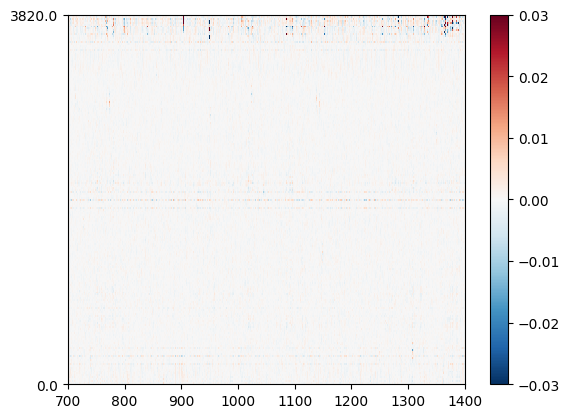

In [3]:
%matplotlib inline
si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))

In [4]:
motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
motion

Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 593/593 [24:02<00:00,  2.43s/it]


Motion rigid - interval 0.004s - 1 segments

(-200.0, 200.0)

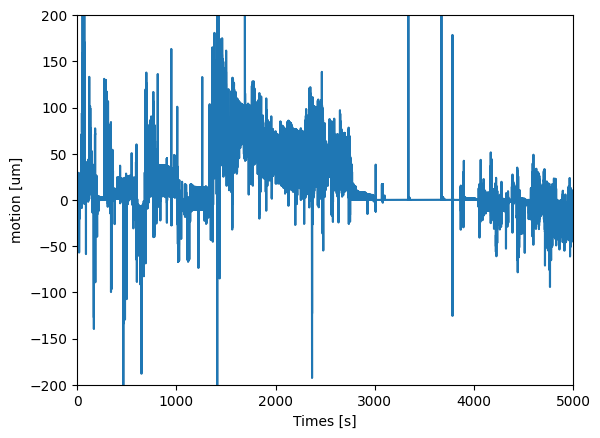

In [9]:
fig, ax = plt.subplots()
si.plot_motion(motion, mode='line', ax=ax)
ax.set_xlim(0, probe0_cat.get_total_duration())
ax.set_ylim(-200, 200)

AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,360,174 samples 
                                 5,440.70s (1.51 hours) - float32 dtype - 996.22 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 544/544 [23:58<00:00,  2.64s/it]


(-200.0, 200.0)

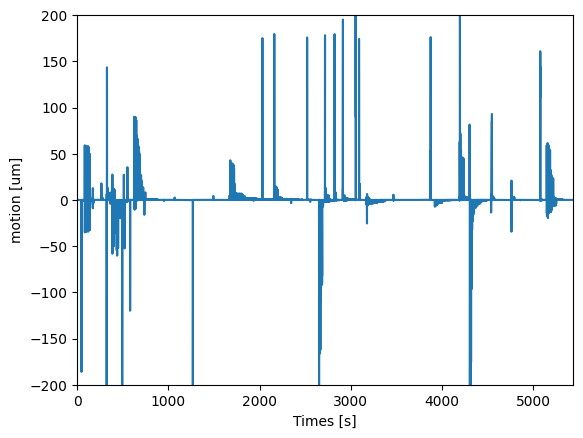

In [12]:
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23038'
date = '20230817'

ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
save_folder = base_folder + mouse + '/ephys/' + date +'/'

probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec0.lf')
probe0_cat = si.concatenate_recordings([probe0_raw])
lfprec = si.bandpass_filter(
    probe0_cat,
    freq_min=0.5,
    freq_max=250,

    margin_ms=1500.,
    filter_order=3,
    dtype="float32",
    add_reflect_padding=True,
)
lfprec = si.phase_shift(lfprec)
lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)

lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
lfprec = si.average_across_direction(lfprec)

print(lfprec)
%matplotlib inline
#si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))
motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
motion


(-300.0, 300.0)

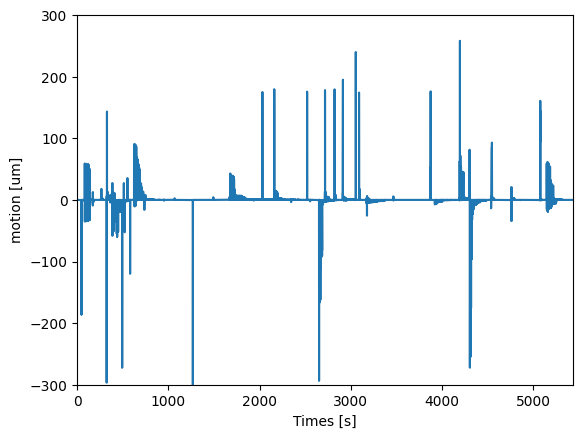

In [13]:
fig, ax = plt.subplots()
si.plot_motion(motion, mode='line', ax=ax)
ax.set_xlim(0, probe0_cat.get_total_duration())
ax.set_ylim(-300, 300)

session ID: M23037 20230810
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,336,010 samples 
                                 5,344.04s (1.48 hours) - float32 dtype - 978.52 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 534/534 [22:33<00:00,  2.53s/it]


session ID: M23037 20230811
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,539,686 samples 
                                 6,158.74s (1.71 hours) - float32 dtype - 1.10 GiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 615/615 [25:30<00:00,  2.49s/it]


session ID: M23037 20230812
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,327,435 samples 
                                 5,309.74s (1.47 hours) - float32 dtype - 972.24 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 530/530 [23:33<00:00,  2.67s/it]


session ID: M23037 20230813
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,414,558 samples 
                                 5,658.23s (1.57 hours) - float32 dtype - 1.01 GiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 565/565 [28:11<00:00,  2.99s/it]


session ID: M23037 20230810
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,336,021 samples 
                                 5,344.08s (1.48 hours) - float32 dtype - 978.53 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 534/534 [31:46<00:00,  3.57s/it]


session ID: M23037 20230811
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,539,696 samples 
                                 6,158.78s (1.71 hours) - float32 dtype - 1.10 GiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 615/615 [36:16<00:00,  3.54s/it]


session ID: M23037 20230812
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,327,444 samples 
                                 5,309.78s (1.47 hours) - float32 dtype - 972.25 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 530/530 [40:53<00:00,  4.63s/it]


session ID: M23037 20230813
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,414,568 samples 
                                 5,658.27s (1.57 hours) - float32 dtype - 1.01 GiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 565/565 [44:45<00:00,  4.75s/it]


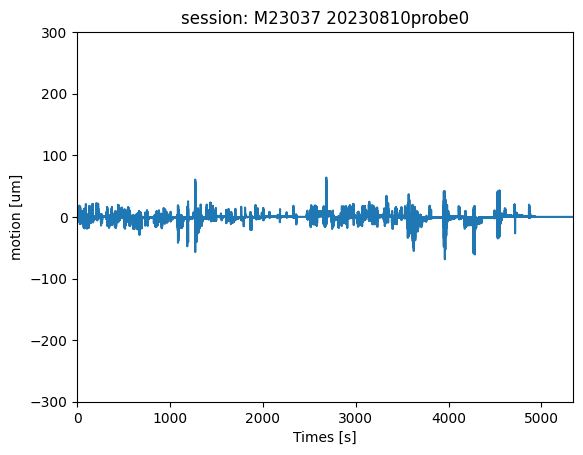

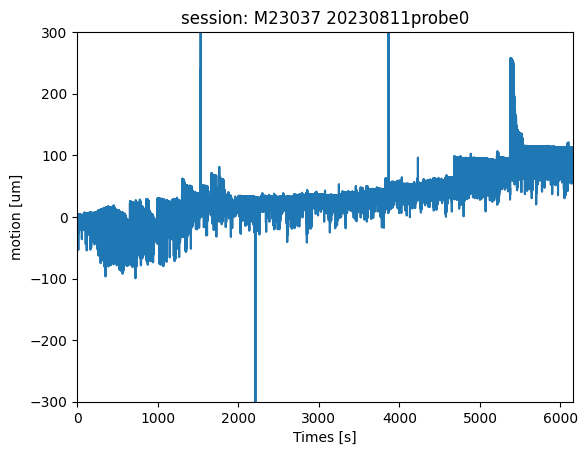

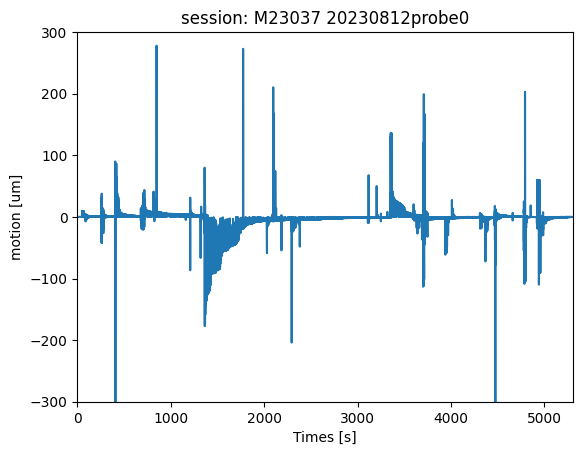

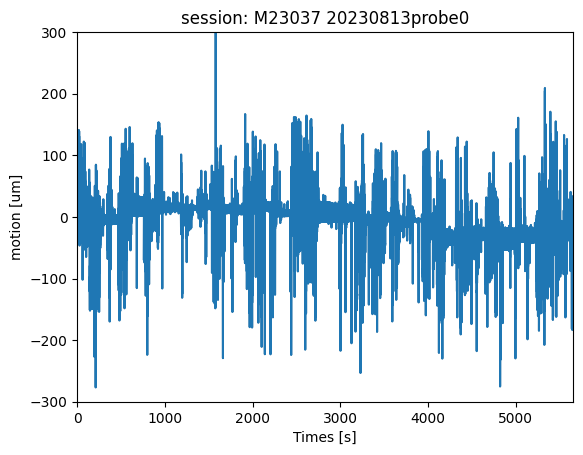

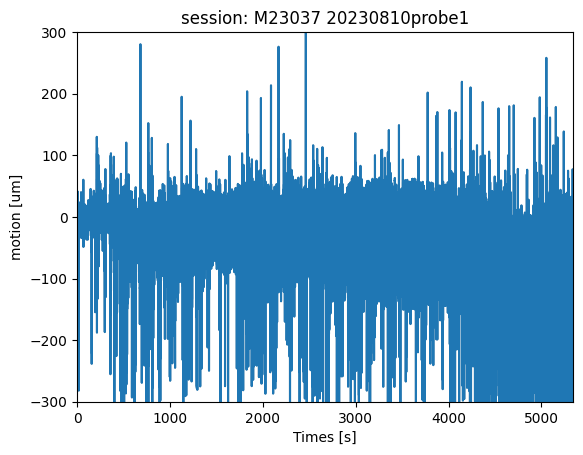

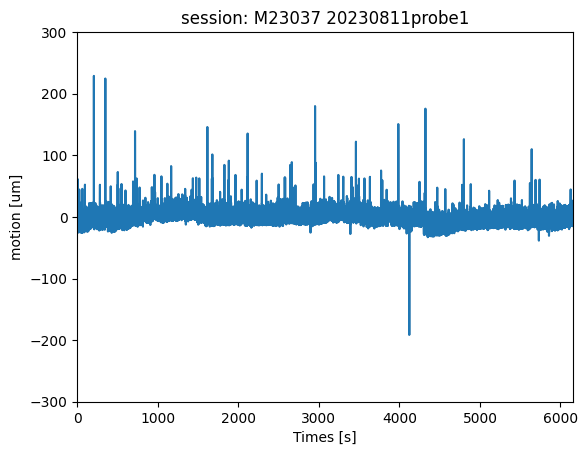

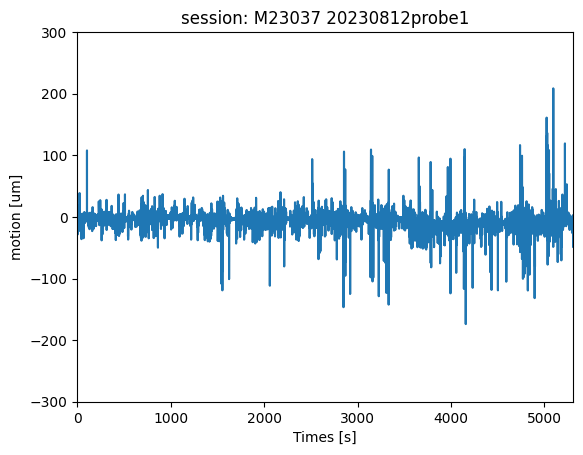

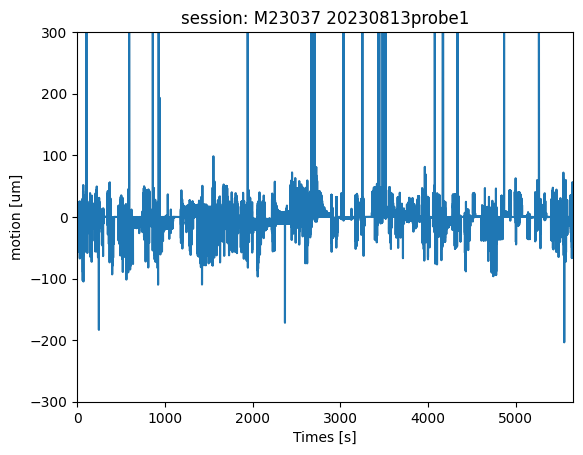

In [17]:
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23037'
dates = ['20230810','20230811','20230812','20230813']
for date in dates:
    ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
    analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
    save_folder = base_folder + mouse + '/ephys/' + date +'/'
    print('session ID: ' + mouse +' ' + date)
    probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec0.lf')
    probe0_cat = si.concatenate_recordings([probe0_raw])
    lfprec = si.bandpass_filter(
        probe0_cat,
        freq_min=0.5,
        freq_max=250,
    
        margin_ms=1500.,
        filter_order=3,
        dtype="float32",
        add_reflect_padding=True,
    )
    lfprec = si.phase_shift(lfprec)
    lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)
    
    lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
    lfprec = si.average_across_direction(lfprec)
    
    print(lfprec)
    %matplotlib inline
    #si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))
    motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
    motion
    fig, ax = plt.subplots()
    si.plot_motion(motion, mode='line', ax=ax)
    ax.set_xlim(0, probe0_cat.get_total_duration())
    ax.set_ylim(-300, 300)
    ax.set_title('session: ' + mouse +' ' + date + 'probe0')

base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23037'
dates = ['20230810','20230811','20230812','20230813']
for date in dates:
    ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
    analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
    save_folder = base_folder + mouse + '/ephys/' + date +'/'
    print('session ID: ' + mouse +' ' + date)
    probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec1.lf')
    probe0_cat = si.concatenate_recordings([probe0_raw])
    lfprec = si.bandpass_filter(
        probe0_cat,
        freq_min=0.5,
        freq_max=250,
    
        margin_ms=1500.,
        filter_order=3,
        dtype="float32",
        add_reflect_padding=True,
    )
    lfprec = si.phase_shift(lfprec)
    lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)
    
    lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
    lfprec = si.average_across_direction(lfprec)
    
    print(lfprec)
    %matplotlib inline
    #si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))
    motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
    motion
    fig, ax = plt.subplots()
    si.plot_motion(motion, mode='line', ax=ax)
    ax.set_xlim(0, probe0_cat.get_total_duration())
    ax.set_ylim(-300, 300)
    ax.set_title('session: ' + mouse +' ' + date+ 'probe1')

session ID: M23034 20230804
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,082,508 samples 
                                 4,330.03s (1.20 hours) - float32 dtype - 792.85 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 433/433 [30:23<00:00,  4.21s/it]


session ID: M23034 20230805
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,187,521 samples 
                                 4,750.08s (1.32 hours) - float32 dtype - 869.77 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 475/475 [27:49<00:00,  3.52s/it]


session ID: M23034 20230806
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,438,859 samples 
                                 5,755.44s (1.60 hours) - float32 dtype - 1.03 GiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 575/575 [32:58<00:00,  3.44s/it]


session ID: M23034 20230807
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,361,161 samples 
                                 5,444.64s (1.51 hours) - float32 dtype - 996.94 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 544/544 [34:50<00:00,  3.84s/it]


session ID: M23034 20230804
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,082,518 samples 
                                 4,330.07s (1.20 hours) - float32 dtype - 792.86 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 433/433 [28:31<00:00,  3.95s/it]


session ID: M23034 20230805
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,187,532 samples 
                                 4,750.13s (1.32 hours) - float32 dtype - 869.77 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 475/475 [27:24<00:00,  3.46s/it]


session ID: M23034 20230806
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,438,870 samples 
                                 5,755.48s (1.60 hours) - float32 dtype - 1.03 GiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 575/575 [32:17<00:00,  3.37s/it]


session ID: M23034 20230807
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,361,199 samples 
                                 5,444.80s (1.51 hours) - float32 dtype - 996.97 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 544/544 [24:37<00:00,  2.72s/it]


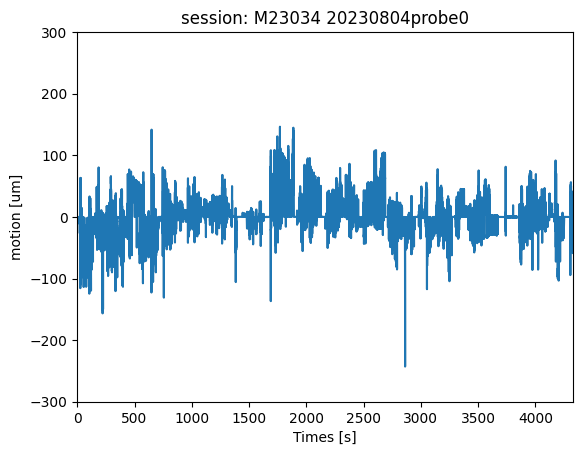

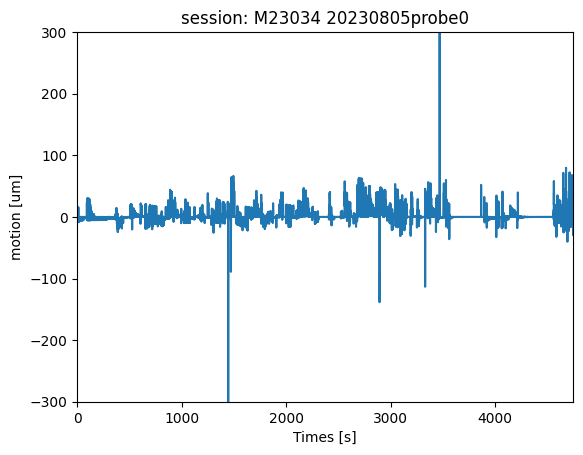

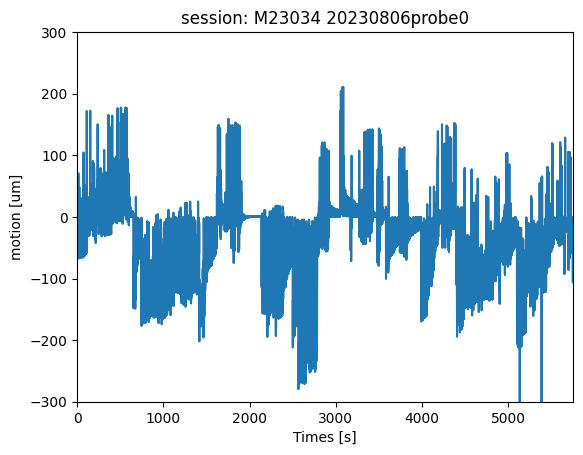

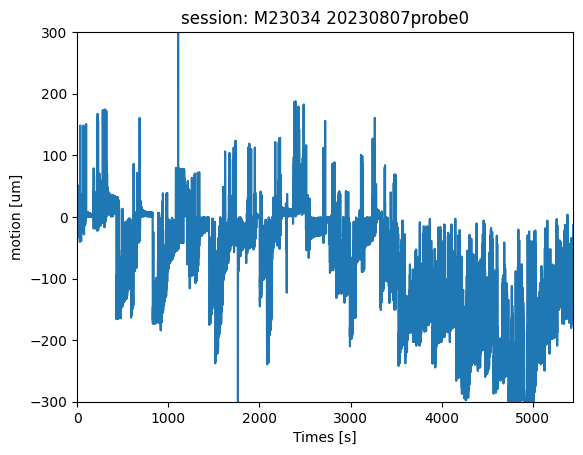

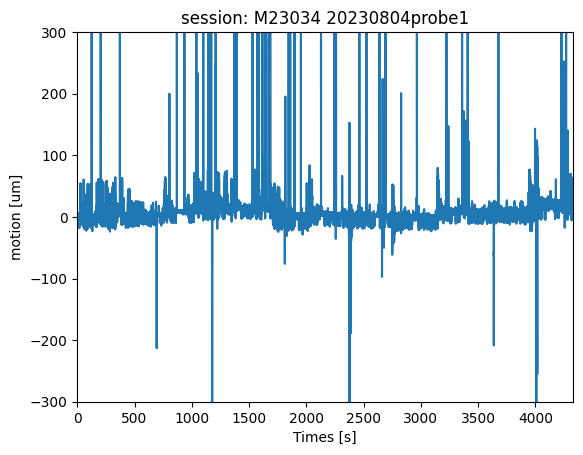

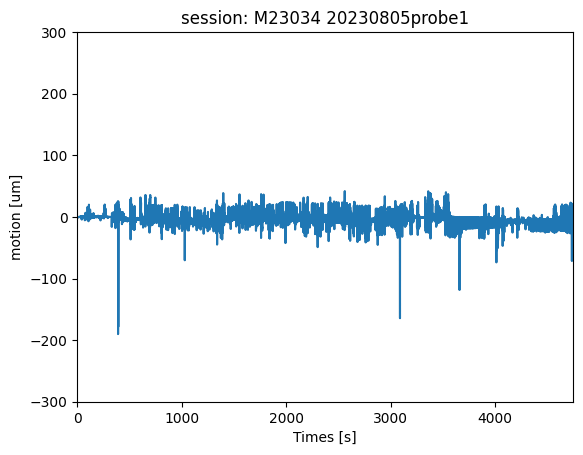

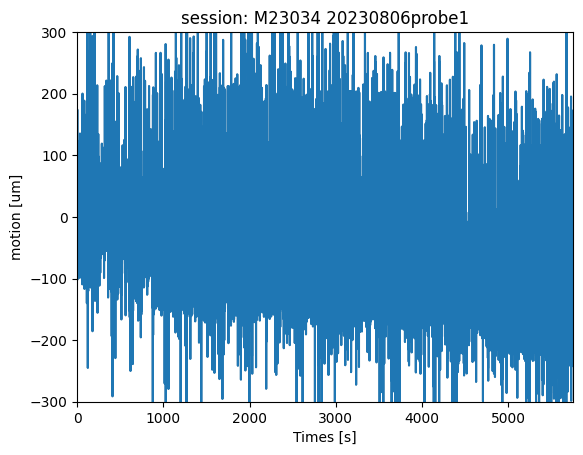

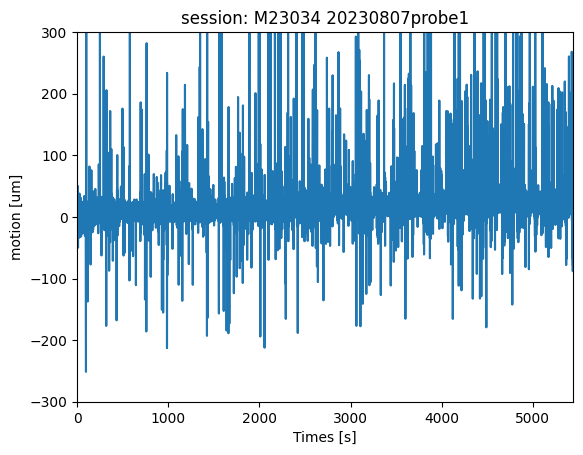

In [18]:
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23034'
dates = ['20230804','20230805','20230806','20230807']
for date in dates:
    ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
    analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
    save_folder = base_folder + mouse + '/ephys/' + date +'/'
    print('session ID: ' + mouse +' ' + date)
    probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec0.lf')
    probe0_cat = si.concatenate_recordings([probe0_raw])
    lfprec = si.bandpass_filter(
        probe0_cat,
        freq_min=0.5,
        freq_max=250,
    
        margin_ms=1500.,
        filter_order=3,
        dtype="float32",
        add_reflect_padding=True,
    )
    lfprec = si.phase_shift(lfprec)
    lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)
    
    lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
    lfprec = si.average_across_direction(lfprec)
    
    print(lfprec)
    %matplotlib inline
    #si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))
    motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
    motion
    fig, ax = plt.subplots()
    si.plot_motion(motion, mode='line', ax=ax)
    ax.set_xlim(0, probe0_cat.get_total_duration())
    ax.set_ylim(-300, 300)
    ax.set_title('session: ' + mouse +' ' + date + 'probe0') 

base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23034'
dates = ['20230804','20230805','20230806','20230807']
for date in dates:
    ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
    analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
    save_folder = base_folder + mouse + '/ephys/' + date +'/'
    print('session ID: ' + mouse +' ' + date)
    probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec1.lf')
    probe0_cat = si.concatenate_recordings([probe0_raw])
    lfprec = si.bandpass_filter(
        probe0_cat,
        freq_min=0.5,
        freq_max=250,
    
        margin_ms=1500.,
        filter_order=3,
        dtype="float32",
        add_reflect_padding=True,
    )
    lfprec = si.phase_shift(lfprec)
    lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)
    
    lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
    lfprec = si.average_across_direction(lfprec)
    
    print(lfprec)
    %matplotlib inline
    #si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))
    motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
    motion
    fig, ax = plt.subplots()
    si.plot_motion(motion, mode='line', ax=ax)
    ax.set_xlim(0, probe0_cat.get_total_duration())
    ax.set_ylim(-300, 300)
    ax.set_title('session: ' + mouse +' ' + date + 'probe1') 

session ID: M23032 20230718
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 939,985 samples 
                                 3,759.94s (1.04 hours) - float32 dtype - 688.47 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 375/375 [15:38<00:00,  2.50s/it]


session ID: M23032 20230719
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 852,060 samples 
                                 3,408.24s (56.80 minutes) - float32 dtype - 624.07 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 340/340 [14:15<00:00,  2.52s/it]


session ID: M23032 20230720
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,009,662 samples 
                                 4,038.65s (1.12 hours) - float32 dtype - 739.50 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 403/403 [17:30<00:00,  2.61s/it]


session ID: M23032 20230721
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 949,350 samples 
                                 3,797.40s (1.05 hours) - float32 dtype - 695.32 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 379/379 [15:24<00:00,  2.44s/it]


session ID: M23032 20230722
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,008,587 samples 
                                 4,034.35s (1.12 hours) - float32 dtype - 738.71 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 403/403 [16:02<00:00,  2.39s/it]


session ID: M23032 20230718
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 939,992 samples 
                                 3,759.97s (1.04 hours) - float32 dtype - 688.47 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 375/375 [14:27<00:00,  2.31s/it]


session ID: M23032 20230719
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 852,073 samples 
                                 3,408.29s (56.80 minutes) - float32 dtype - 624.08 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 340/340 [12:44<00:00,  2.25s/it]


session ID: M23032 20230720
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,009,669 samples 
                                 4,038.68s (1.12 hours) - float32 dtype - 739.50 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 403/403 [15:34<00:00,  2.32s/it]


session ID: M23032 20230721
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 949,287 samples 
                                 3,797.15s (1.05 hours) - float32 dtype - 695.28 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 379/379 [15:03<00:00,  2.38s/it]


session ID: M23032 20230722
AverageAcrossDirectionRecording: 192 channels - 250.0Hz - 1 segments - 1,008,597 samples 
                                 4,034.39s (1.12 hours) - float32 dtype - 738.72 MiB


Online chunks [10.0s each]: 100%|██████████████████████████████████████████| 403/403 [17:12<00:00,  2.56s/it]


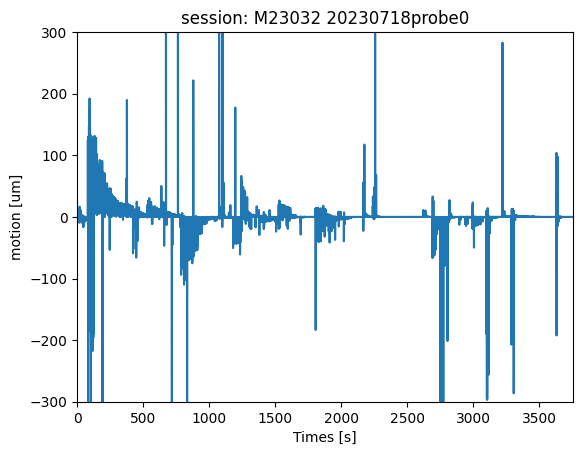

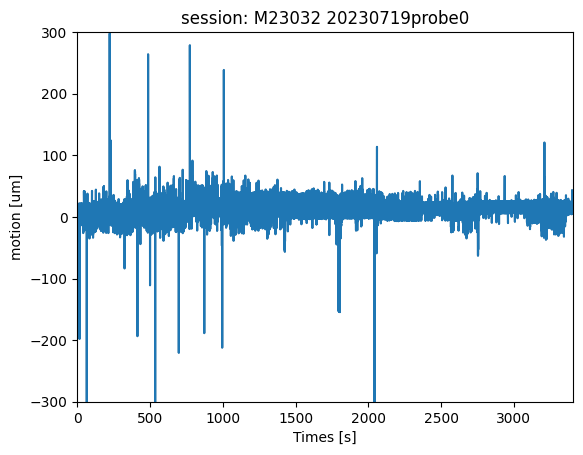

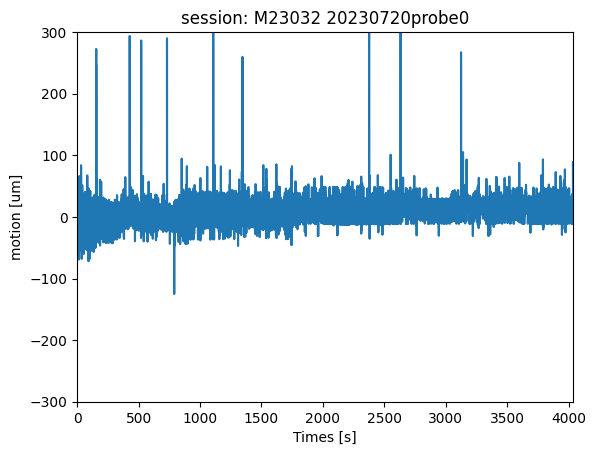

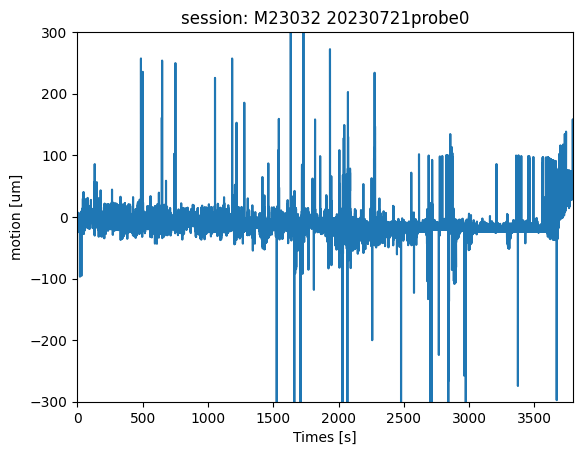

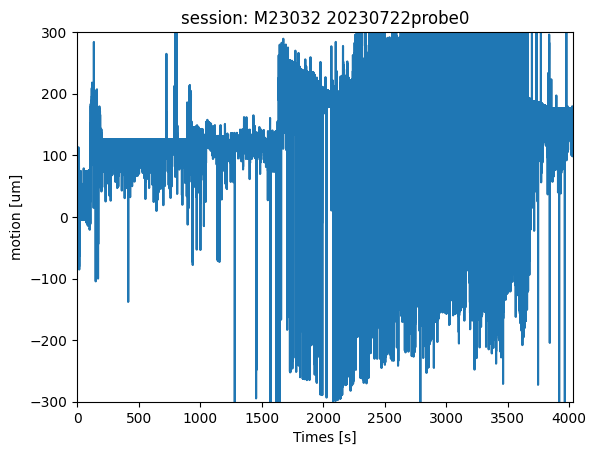

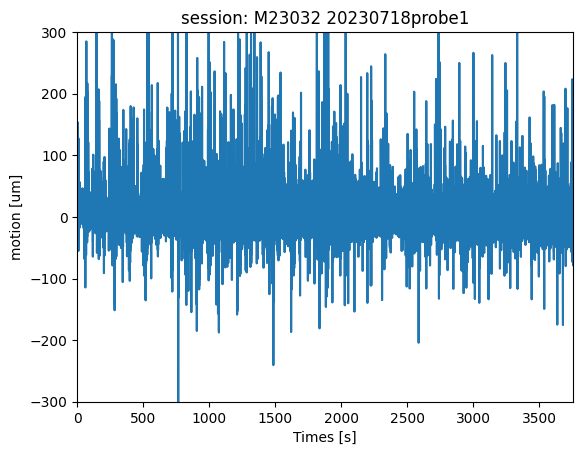

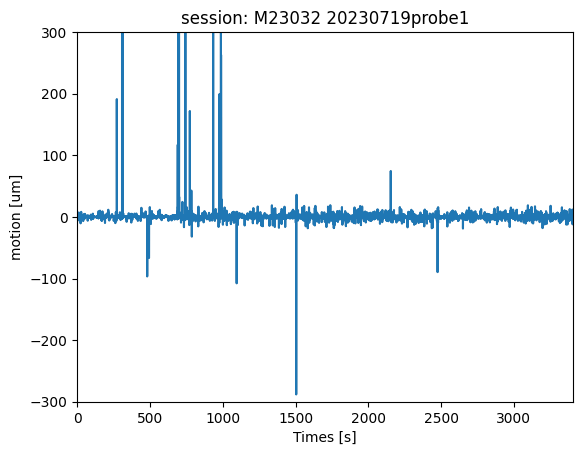

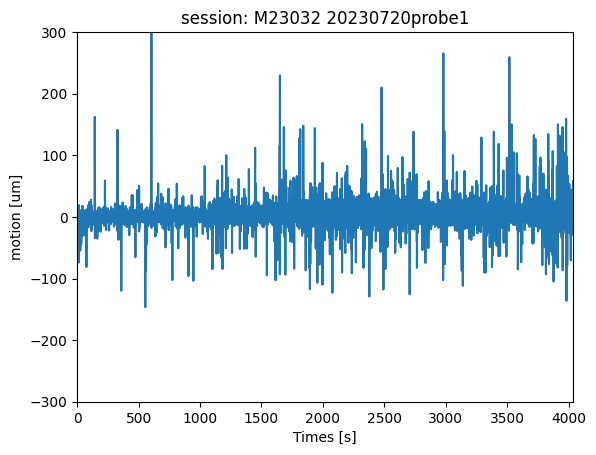

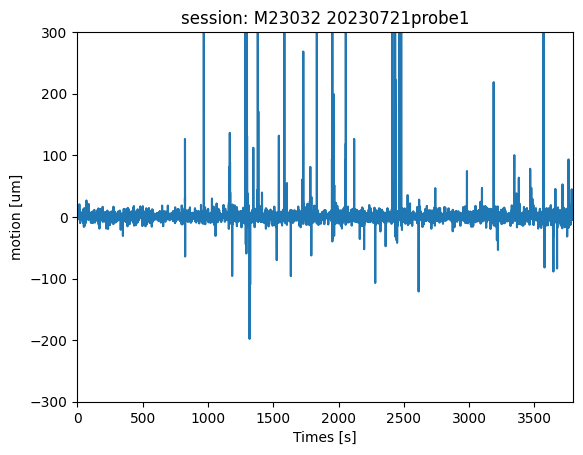

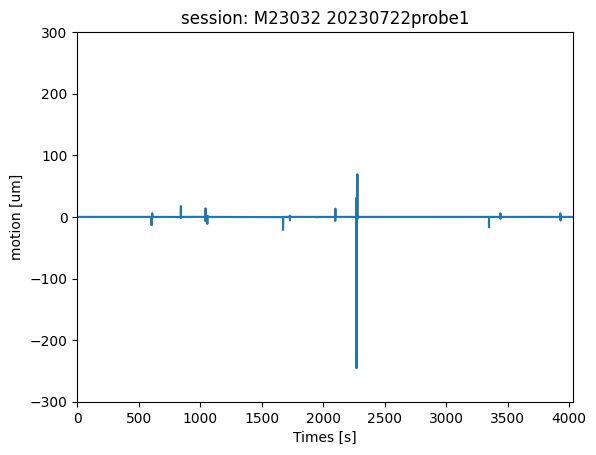

In [19]:
base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23032'
dates = ['20230718','20230719','20230720','20230721','20230722']
for date in dates:
    ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
    analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
    save_folder = base_folder + mouse + '/ephys/' + date +'/'
    print('session ID: ' + mouse +' ' + date)
    probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec0.lf')
    probe0_cat = si.concatenate_recordings([probe0_raw])
    lfprec = si.bandpass_filter(
        probe0_cat,
        freq_min=0.5,
        freq_max=250,
    
        margin_ms=1500.,
        filter_order=3,
        dtype="float32",
        add_reflect_padding=True,
    )
    lfprec = si.phase_shift(lfprec)
    lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)
    
    lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
    lfprec = si.average_across_direction(lfprec)
    
    print(lfprec)
    %matplotlib inline
    #si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))
    motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
    motion
    fig, ax = plt.subplots()
    si.plot_motion(motion, mode='line', ax=ax)
    ax.set_xlim(0, probe0_cat.get_total_duration())
    ax.set_ylim(-300, 300)
    ax.set_title('session: ' + mouse +' ' + date + 'probe0') 

base_folder = '/mnt/rds01/ibn-vision/DATA/SUBJECTS/'
mouse = 'M23032'
dates = ['20230718','20230719','20230720','20230721','20230722']
for date in dates:
    ephys_folder = base_folder + mouse + '/ephys/' + date +'/'
    analysis_folder = base_folder + mouse + '/analysis/' + date +'/'
    save_folder = base_folder + mouse + '/ephys/' + date +'/'
    print('session ID: ' + mouse +' ' + date)
    probe0_raw = si.read_spikeglx(ephys_folder, stream_name='imec1.lf')
    probe0_cat = si.concatenate_recordings([probe0_raw])
    lfprec = si.bandpass_filter(
        probe0_cat,
        freq_min=0.5,
        freq_max=250,
    
        margin_ms=1500.,
        filter_order=3,
        dtype="float32",
        add_reflect_padding=True,
    )
    lfprec = si.phase_shift(lfprec)
    lfprec = si.resample(lfprec, resample_rate=250, margin_ms=1000)
    
    lfprec = si.directional_derivative(lfprec, order=2, edge_order=1)
    lfprec = si.average_across_direction(lfprec)
    
    print(lfprec)
    %matplotlib inline
    #si.plot_traces(lfprec, backend="matplotlib", mode="map", clim=(-0.03, 0.03), time_range=(700, 1400))
    motion = estimate_motion(lfprec, method='dredge_lfp', rigid=True, progress_bar=True)
    motion
    fig, ax = plt.subplots()
    si.plot_motion(motion, mode='line', ax=ax)
    ax.set_xlim(0, probe0_cat.get_total_duration())
    ax.set_ylim(-300, 300)
    ax.set_title('session: ' + mouse +' ' + date + 'probe1') 